## Final Project Submission

Please fill out:
* Student name: Allan Ofula
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Mildred Jepkosgei
* Blog post URL:

## Phase 1 Project Description

## Project Overview
For this project, you will use data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.

## Business Problem
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## Data
"AviationData.csv' from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

## AVIATION SAFETY RISK ANALYSIS PROJECT
This analysis focuses on examining aviation accident data to uncover patterns, trends and key insights. Using Python and Pandas, we aim to clean the dataset, explore critical information, and visualize findings to better understand accident causes, frequencies, and outcomes which will help in identifying areas for improvement in aviation safety.

## 1. Loading and Inspecting Dataset
In this section, we will load the aviation accident dataset and perform a quick exploration to understand its structure.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the dataset
#encoding='latin1' to help handle unencoded or special characters in the dataset
#low-memory= False, prevent the warning/problematic columns by reading the entire file at once
df = pd.read_csv('AviationData.csv', encoding='latin1', low_memory=False)

#Display the first five rows of the dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# 2. Inspecting the dataset


In [7]:
# Getting basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [8]:
# Summary statistics
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


# 3. Checking for Duplicates

In [10]:
# Checking for duplicate rows
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")

Number of duplicate rows: 0


## 4. Checking and Handling Missing Values

In [12]:
# Checking for missing values
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

# Handling missing values in Location and Country
These columns are crucial in identifying accident hotspots

In [14]:
# Checking how many rows have missing values in Location and Country
missing_location_country = df[df['Location'].isna() & df['Country'].isna()]
print("Rows with both Location and Country missing:", missing_location_country.shape[0])

Rows with both Location and Country missing: 1


In [15]:
# Dropping row where both Location and Country are missing
df_cleaned = df.dropna(subset=['Location', 'Country'], how='all')

# Checking the shape of the dataset after cleaning
print("Dataset shape after cleaning Location and Country:", df_cleaned.shape)

Dataset shape after cleaning Location and Country: (88888, 31)


# Handling missing values in Latitude and Longitude
The columns are crucial for mapping accident locations.

In [17]:
# Checking for missing values in Latitude and Longitude
print("Missing Latitude values:", df_cleaned['Latitude'].isna().sum())
print("Missing Longitude values:", df_cleaned['Longitude'].isna().sum())

Missing Latitude values: 54506
Missing Longitude values: 54515


We have asignificant number of missing values for both Latitude and Longitude and since these are critical for location analysis we will:
-Drop rows where both Latitude and Longitude
-Keep rows where at least one of them exists

In [19]:
# Drop rows where both Latitude and Longitude are missing
df_cleaned = df_cleaned.dropna(subset=['Latitude', 'Longitude'], how='all')

# Verify the new dataset shape
print("Dataset shape after dropping rows with missing coordinates:", df_cleaned.shape)

Dataset shape after dropping rows with missing coordinates: (34388, 31)


# Handling missing values in Injury Severity and Total Fatal Injuries
These columns are crucial as they help us assess the impact and severity of accidents in our analysis

In [21]:
# Checking for missing values in Total.Fatal.Injuries
print("Missing values in Total.Fatal.Injuries:", df_cleaned['Total.Fatal.Injuries'].isna().sum())


Missing values in Total.Fatal.Injuries: 9264


In [22]:
# Checking rows with missing 'Total.Fatal.Injuries' and any other injury columns populated
missing_fatal_injuries = df_cleaned[df_cleaned['Total.Fatal.Injuries'].isnull()]
print(missing_fatal_injuries[['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].describe())


       Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured
count             1264.000000           2027.000000      6971.000000
mean                 1.313291              1.599408         7.474394
std                  0.685754              1.777439        33.573240
min                  1.000000              0.000000         0.000000
25%                  1.000000              1.000000         1.000000
50%                  1.000000              1.000000         2.000000
75%                  1.000000              2.000000         2.000000
max                 10.000000             43.000000       699.000000


1264 rows have values in Total.Serious.Injuries, 2027 rows have values in Total.Minor.Injuries,6971 rows have values in Total.Uninjured. This means ome rows with missing Total.Fatal.Injuries still contain serious or minor injury data, indicating that these incidents likely had no fatalities.

In [24]:
# Filling missing 'Total.Fatal.Injuries' with 0 if any injury is NaN or data exists
df_cleaned['Total.Fatal.Injuries'] = df_cleaned['Total.Fatal.Injuries'].fillna(0)

# Verifying the changes
missing_fatal_injuries_after = df_cleaned['Total.Fatal.Injuries'].isnull().sum()
print(f"Missing values in Total.Fatal.Injuries after filling: {missing_fatal_injuries_after}")

Missing values in Total.Fatal.Injuries after filling: 0


# Handling Weather.Condition and Broad.phase.of.flight
-These columns help us understand external factors contributing to accidents, standardizing there values will ease our analysis.

In [26]:
# Check unique values in Weather.Condition and Broad.phase.of.flight
print("Unique Weather Conditions:", df_cleaned['Weather.Condition'].unique())
print("Unique Flight Phases:", df_cleaned['Broad.phase.of.flight'].unique())

Unique Weather Conditions: ['IMC' 'VMC' 'UNK' nan 'Unk']
Unique Flight Phases: ['Cruise' 'Climb' 'Landing' 'Unknown' 'Approach' 'Takeoff' 'Maneuvering'
 'Standing' 'Taxi' 'Descent' 'Go-around' nan 'Other']


In [27]:
# Filling missing weather conditions with 'Unknown' for consistency and easier analysis.
df_cleaned['Weather.Condition'] = df_cleaned['Weather.Condition'].fillna('Unknown')
df_cleaned['Broad.phase.of.flight'] = df_cleaned['Broad.phase.of.flight'].fillna('Unknown')

# Verifying the changes
df_cleaned[['Weather.Condition', 'Broad.phase.of.flight']].head()

,Weather.Condition,Broad.phase.of.flight
2,IMC,Cruise
5,VMC,Climb
593,IMC,Landing
3654,VMC,Cruise
6202,IMC,Cruise


In [28]:
# Saving the cleaned dataset For Tableau Dashboard
df_cleaned.to_csv('aviation_accidents_cleaned.csv', index=False)

## 5. Exploratory Data Analysis (EDA)
Here we are: 
-Analyzing Accident Trends Over Time 
-Analyzing Accident Distribution by Purpose of Flight and Weather Conditions
-Identify Top Locations with the Most Accidents

## -Analyzing Accident Trends Over Time

In [31]:
 #Converting Event.Date to datetime format to help easily analyze accident trends over time.
df_cleaned['Event.Date'] = pd.to_datetime(df_cleaned['Event.Date'], errors='coerce')

# Checking for any missing or invalid dates
print("Number of missing dates:", df_cleaned['Event.Date'].isna().sum())

Number of missing dates: 0


In [32]:
# Creating new columns for Year, Month, and Day
df_cleaned['Year'] = df_cleaned['Event.Date'].dt.year
df_cleaned['Month'] = df_cleaned['Event.Date'].dt.month
df_cleaned['Day'] = df_cleaned['Event.Date'].dt.day

# Displaying the first few rows to verify the changes
df_cleaned[['Event.Date', 'Year', 'Month', 'Day']].head()

,Event.Date,Year,Month,Day
2,1974-08-30,1974,8,30
5,1979-09-17,1979,9,17
593,1982-03-16,1982,3,16
3654,1983-01-08,1983,1,8
6202,1983-09-09,1983,9,9


In [33]:
# Counting accidents per year
accidents_per_year = df_cleaned['Year'].value_counts().sort_index()
print(accidents_per_year)

Year
1974       1
1979       1
1982       1
1983       2
1988       1
1989       1
1990       1
1992       1
1995       1
1997       1
1998       3
1999       9
2000     147
2001     864
2002    1682
2003    1975
2004    1799
2005    1891
2006    1714
2007    1884
2008    1805
2009    1681
2010    1633
2011    1719
2012    1656
2013    1416
2014    1421
2015    1444
2016    1494
2017    1461
2018    1461
2019    1426
2020    1227
2021    1256
2022    1309
Name: count, dtype: int64


## Plotting Accident Trends Over The Years

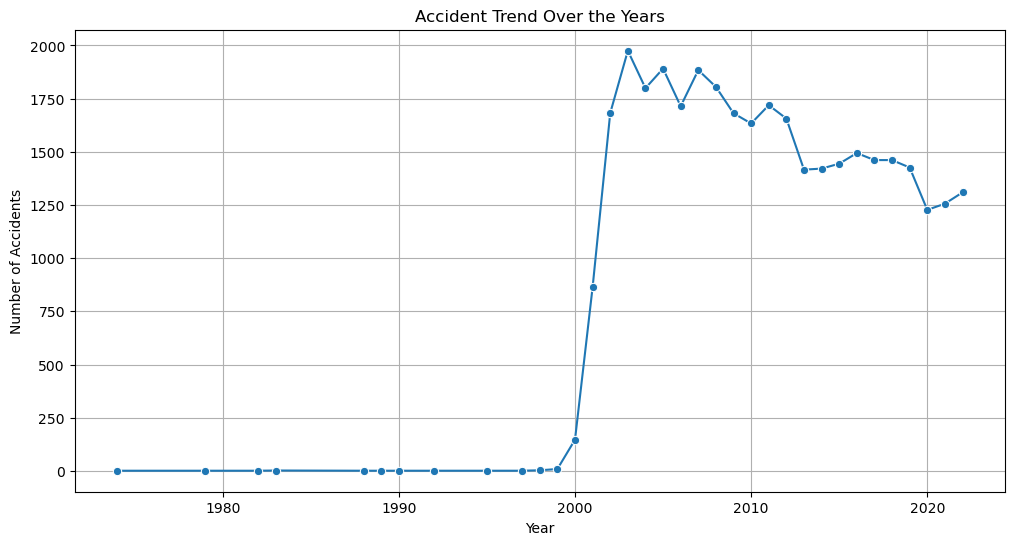

In [35]:
# Plotting the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values, marker='o')
plt.title('Accident Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)

#Display
plt.show()

Findings:
The accident trend from 1974 to 2022 reveals a significant increase in reported incidents between 2000 and 2003, with 2003 recording the highest number of accidents. 
After 2003, the number of accidents stabilized at a high level before gradually declining from 2014 onwards. Notable decreases are observed after 2020, with the lowest counts in recent years.

Insights:
The surge in accidents between 2000 and 2003 could be attributed to a rise in air traffic, changes in reporting standards, or operational challenges during that period. 
The gradual decline from 2014 indicates improvements in aviation safety standards, advanced technology, and better pilot training. 
The sharp drop in 2020 and 2021 may also reflect reduced air travel due to the global pandemic. 

## Analyzing Accident distribution by weather condition

In [38]:
# Counting the occurrences of each weather condition
weather_counts = df_cleaned['Weather.Condition'].value_counts()
print(weather_counts)

Weather.Condition
VMC        30608
IMC         1823
Unknown     1737
Unk          219
UNK            1
Name: count, dtype: int64


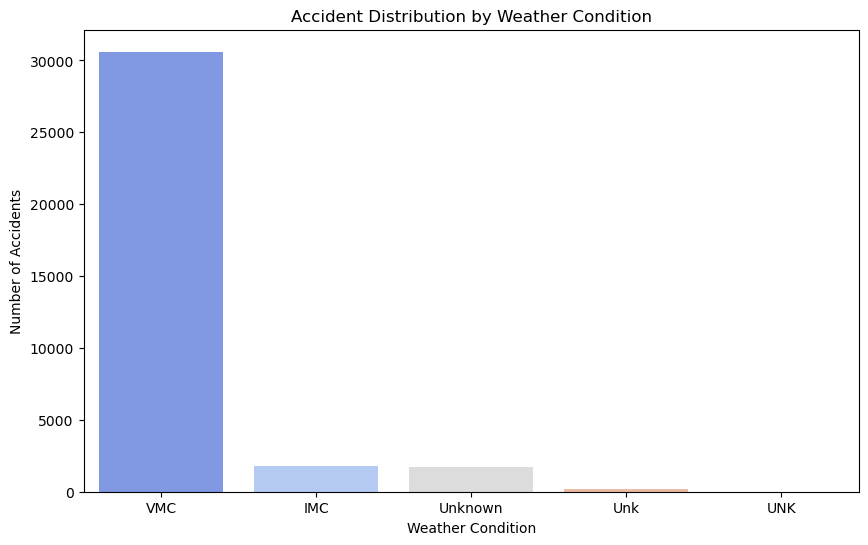

In [39]:
# Plotting the Accident distribution by weather condition

plt.figure(figsize=(10, 6))
sns.barplot(x=weather_counts.index, y=weather_counts.values, hue=weather_counts.index, dodge=False, palette='coolwarm', legend=False)
plt.title('Accident Distribution by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')

#Display
plt.show()

Key Findings:
VMC (Visual Meteorological Conditions) accounts for the majority of accidents over 80%. Since VMC generally indicates good weather conditions this implies that weather conditions alone may not be a primary factor in most of these accidents.
IMC (Instrument Meteorological Conditions) which is often associated with poor visibility or bad weather conditions contributes to around 5% of the accidents. This is the same with unknown weather conditions.
There are a few entries labeled as UNK/Unk, indicating potential data inconsistency or missing data.

Insights:
Accidents in good weather conditions (VMC) suggest that pilot error or mechanical failure may play a more significant role than weather.
For IMC cases, it may be worth analyzing accident causes and preventive measures related to instrument failure or navigation issues.
For 'unknown Weather Conditions' it will be proper diving in to find out what these factors are and address potential solutions.

## Analyzing Accident Distribution by Flight Phase

In [42]:
# Counting the occurrences of each flight phase
flight_phase_counts = df_cleaned['Broad.phase.of.flight'].value_counts()
flight_phase_counts

Broad.phase.of.flight
Unknown        22948
Landing         3220
Takeoff         2200
Cruise          1780
Maneuvering     1479
Approach        1221
Taxi             377
Descent          344
Climb            339
Go-around        263
Standing         199
Other             18
Name: count, dtype: int64

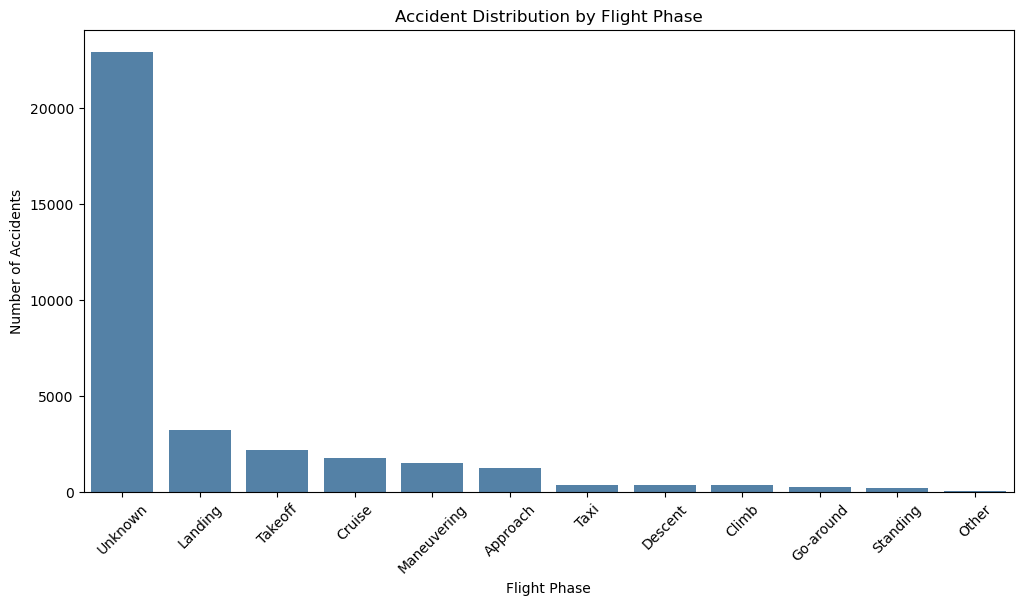

In [43]:
# Plotting accident distribution by flight phase
plt.figure(figsize=(12, 6))
sns.barplot(x=flight_phase_counts.index, y=flight_phase_counts.values, color='steelblue')
plt.xticks(rotation=45)
plt.title('Accident Distribution by Flight Phase')
plt.xlabel('Flight Phase')
plt.ylabel('Number of Accidents')

#Display
plt.show()

Key Findings:
Unknown, landing and takeoff phases have the highest number of accidents, accounting for more than half of all incidents, suggesting that the critical phases at the beginning and end of a flight are the most vulnerable.
Cruise phase, maneuvering and approach phase accidents are less frequent but could be catastrophic due to the typical high altitude and speed.

Insights:
Focus on improving safety during landing, Takeoff and approach. This may involve pilot training, advanced navigation aids, or enhanced aircraft maintenance protocols.
Takeoff and Landing phases should also be prioritized for preventive measures.
For 'unknown' it will be proper investigating to find out what these factors are and address potential solutions.

## Analyzing Accident Distribution by Purpose of Flight

In [46]:
# Counting accidents by Purpose of Flight
purpose_counts = df_cleaned['Purpose.of.flight'].value_counts()
print(purpose_counts)

Purpose.of.flight
Personal                     20439
Instructional                 4356
Aerial Application            1523
Business                       929
Positioning                    800
Other Work Use                 568
Aerial Observation             385
Flight Test                    373
Unknown                        354
Public Aircraft                190
Ferry                          166
Executive/corporate            155
Skydiving                      138
External Load                  117
Public Aircraft - Federal      103
Banner Tow                     100
Air Race show                   94
Public Aircraft - Local         72
Public Aircraft - State         63
Air Race/show                   57
Glider Tow                      52
Firefighting                    33
Air Drop                         8
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64


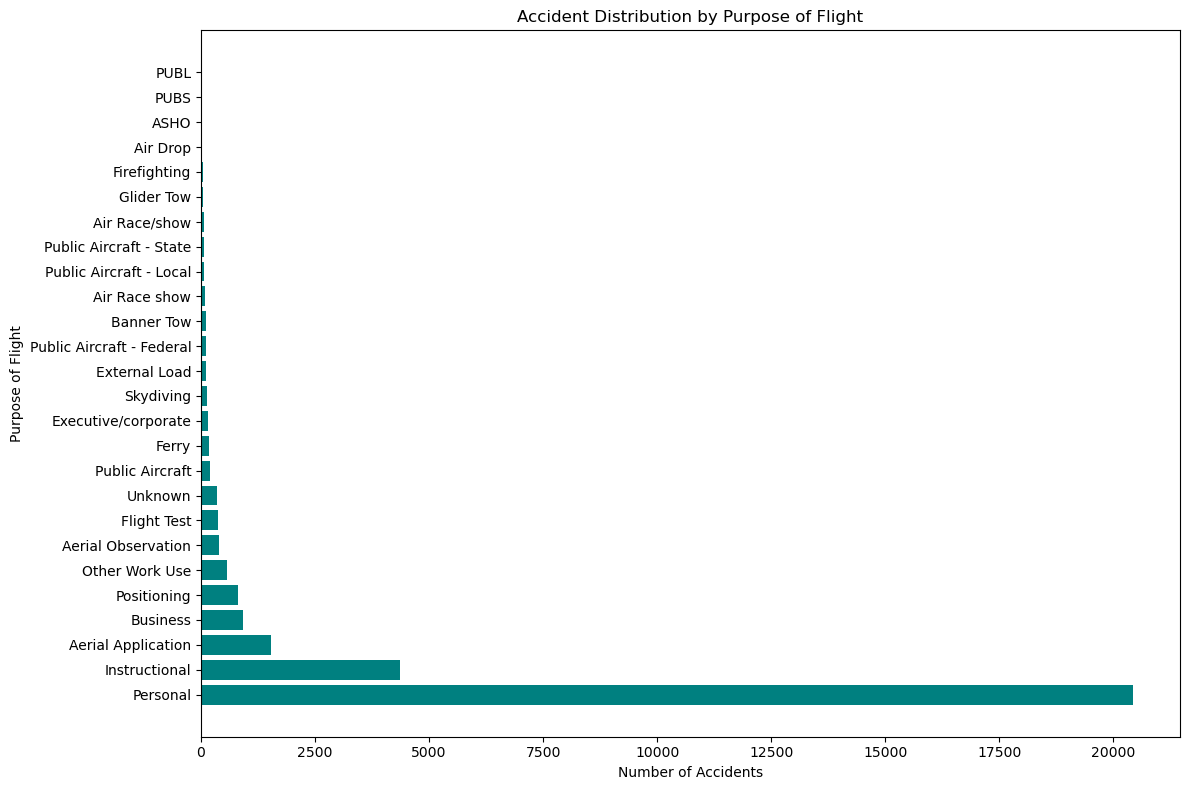

In [47]:
# Plotting accident distribution by purpose of flight
plt.figure(figsize=(12, 8))
plt.barh(purpose_counts.index, purpose_counts.values, color='teal')
plt.title('Accident Distribution by Purpose of Flight')
plt.xlabel('Number of Accidents')
plt.ylabel('Purpose of Flight')
plt.tight_layout()  # Ensures everything fits

#Display
plt.show()

Key Findings:
Personal flights account for the majority of accidents, with 20,439 incidents(over 60%), followed by Instructional flights with 4,356 incidents. Aerial Application with 1,523 incidents and Business flights with 929 incidents. Specialized operations such as Public Aircraft and Aerial Observation recorded fewer incidents, while less frequent purposes like Firefighting and Air Drop are at the lower end of the spectrum. A significant portion of accidents falls under the 'Other Work Use' and 'Unknown' categories, which may indicate incomplete data classification hence need to diving in to address what the unknown are.

Insights: 
The high accident rate in personal flights can be attributed to the wide range of pilot experience levels and less stringent regulations compared to commercial operations. 
Instructional flights involve novice pilots, explaining the relatively high accident frequency. 
Aerial operations, such as Aerial Application and Aerial Observation, pose unique risks due to low-altitude flying and challenging environments. Executive and corporate flights have fewer accidents, likely due to the use of professional pilots and well-maintained aircraft. 
There is therefore need for targeted safety initiatives and enhanced training, particularly for personal and instructional flight operations.

 ## Analzying Accident Distribution by Aircraft Make and Model

In [50]:
# Counting accidents by Aircraft Make
make_counts = df_cleaned['Make'].value_counts().head(10)
print(make_counts)

Make
CESSNA      4597
Cessna      4471
PIPER       2668
Piper       2445
BEECH        980
Beech        970
BELL         484
Bell         447
Robinson     430
BOEING       416
Name: count, dtype: int64


In [51]:
# Converting 'Make' to uppercase to handle duplicates 'CESSNA', 'Cessna" as ar result of capitalization
df_cleaned['Make'] = df_cleaned['Make'].str.upper()

# Checking unique values again to confirm the change
print(df_cleaned['Make'].value_counts().head(10))

Make
CESSNA         9068
PIPER          5113
BEECH          1950
BELL            931
BOEING          686
ROBINSON        627
MOONEY          494
BELLANCA        293
AIR TRACTOR     287
HUGHES          282
Name: count, dtype: int64


CESSNA dominates the list with over 9,068 accidents, followed by PIPER, BEECH, and BELL.
These makes are likely the most widely used, especially for general aviation, which may explain the higher accident frequency.

In [53]:
# Counting accidents by Make and Model
make_model_counts = (
    df_cleaned.groupby(['Make', 'Model']).size()
    .reset_index(name='Accident Count')
    .sort_values(by='Accident Count', ascending=False)
    .head(10)
)

print(make_model_counts)

        Make      Model  Accident Count
2479  CESSNA        172             781
2467  CESSNA        152             425
2517  CESSNA       172S             351
2512  CESSNA       172N             348
2546  CESSNA        182             303
2530  CESSNA        180             260
2511  CESSNA       172M             255
7526   PIPER       PA28             253
7407   PIPER  PA-28-140             239
7361   PIPER  PA-18-150             221


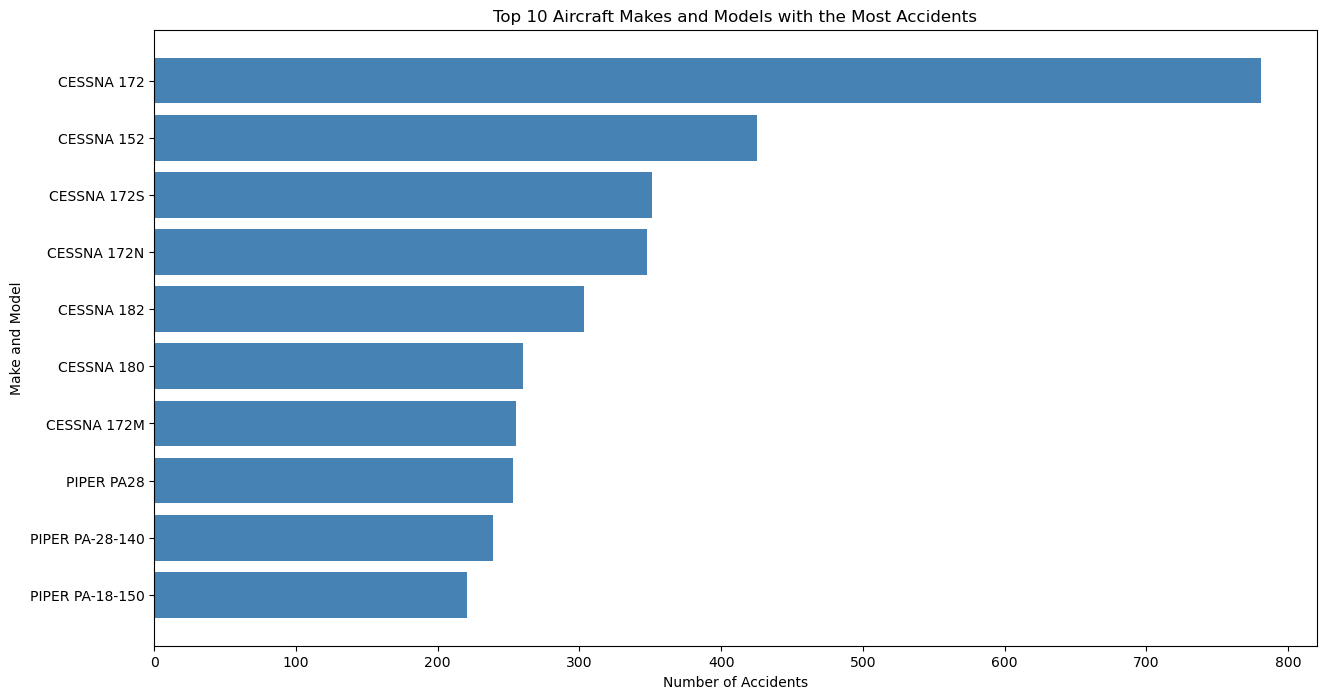

In [54]:
# Plotting
plt.figure(figsize=(15, 8))
plt.barh(make_model_counts['Make'] + ' ' + make_model_counts['Model'], make_model_counts['Accident Count'], color='steelblue')
plt.xlabel('Number of Accidents')
plt.ylabel('Make and Model')
plt.title('Top 10 Aircraft Makes and Models with the Most Accidents')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest count at the top
plt.show()

CESSNA dominates the list with over 9,068 accidents, followed by PIPER, BEECH, and BELL. These makes are likely the most widely used, especially for general aviation, which may explain the higher accident frequency.

The Cessna 172 series is by far the most frequent model in accidents, with 781 incidents, followed by Cessna 152, and Cessna 172S/N/M variations.
The Piper PA-28 and PA-18-150 are also notable for frequent incidents, indicating a pattern of risk among specific light aircraft and helicopters.

# Determining the Top 10 Riskiest and Top 10 Safest Aircraft Models

In [57]:
# Grouping data by Model and calculating total accidents and fatalities
model_risk = df_cleaned.groupby('Model').agg(
    total_accidents=('Model', 'count'),
    total_fatal_injuries=('Total.Fatal.Injuries', 'sum')
).reset_index()

# Calculating Fatality Rate
model_risk['fatality_rate'] = (model_risk['total_fatal_injuries'] / model_risk['total_accidents']) * 100

# Filtering out models with very few accidents (e.g., less than 5)
model_risk_filtered = model_risk[model_risk['total_accidents'] >= 5]

In [58]:
# Sorting for riskiest models
riskiest_models = model_risk_filtered.sort_values(by='fatality_rate', ascending=False).head(10)

print("Top 10 Riskiest Models:")
print(riskiest_models)


Top 10 Riskiest Models:
          Model  total_accidents  total_fatal_injuries  fatality_rate
829     737-200                6                 379.0    6316.666667
4206      MD-83                6                 153.0    2550.000000
1171       A330               11                 228.0    2072.727273
843     737-400                5                 102.0    2040.000000
2639  DHC-8-402                5                  49.0     980.000000
2631  DHC-6-300                5                  20.0     400.000000
2626      DHC-6                7                  25.0     357.142857
813         737               78                 232.0     297.435897
4974      PC-12                6                  16.0     266.666667
755      65-A90                8                  20.0     250.000000


# Plotting Top 10 Riskiest Models

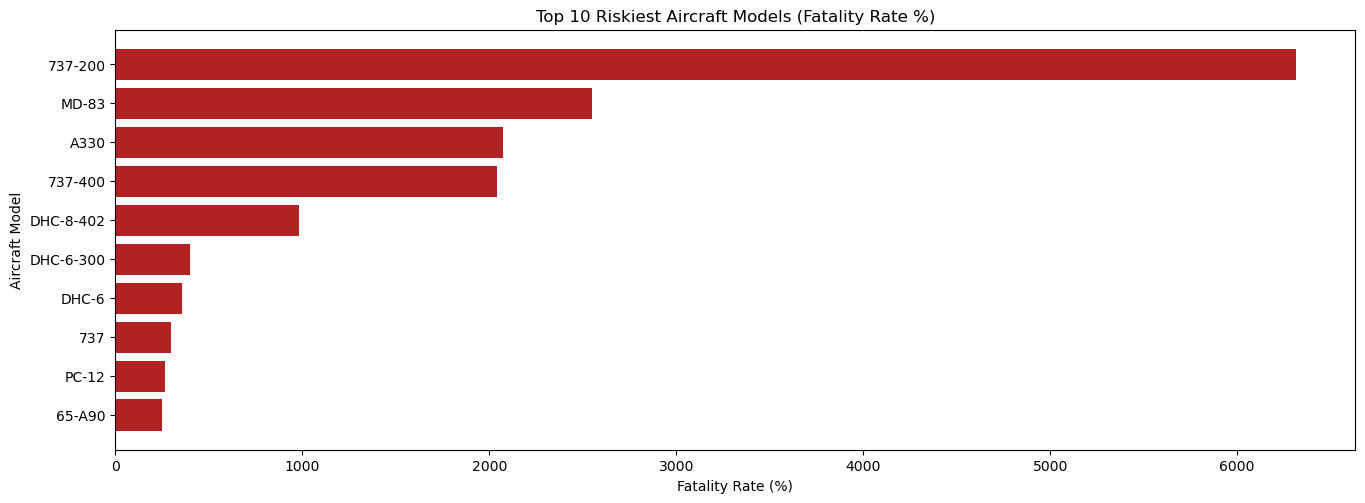

In [60]:
# Plotting Top 10 Riskiest Models
riskiest_models = {
    '737-200': 6316.67, 'MD-83': 2550.00, 'A330': 2072.73, '737-400': 2040.00,
    'DHC-8-402': 980.00, 'DHC-6-300': 400.00, 'DHC-6': 357.14, '737': 297.44,
    'PC-12': 266.67, '65-A90': 250.00
}


plt.figure(figsize=(16, 12))
plt.subplot(2, 1, 1)
plt.barh(list(riskiest_models.keys()), list(riskiest_models.values()), color='firebrick')
plt.title('Top 10 Riskiest Aircraft Models (Fatality Rate %)')
plt.xlabel('Fatality Rate (%)')
plt.ylabel('Aircraft Model')
plt.gca().invert_yaxis()  # Invert y-axis for better readability

#Display
plt.show()

The 737-200, MD-83, A330 and 737-400 have extremely high fatality rates, making them highly risky.

In [62]:
# Sorting for safest models
safest_models = model_risk_filtered[model_risk_filtered['fatality_rate'] > 0].sort_values(by='fatality_rate').head(10)

print("\nTop 10 Safest Models:")
print(safest_models)


Top 10 Safest Models:
          Model  total_accidents  total_fatal_injuries  fatality_rate
4741  PA-22-160               40                   1.0       2.500000
4731      PA-20               40                   1.0       2.500000
216        180H               37                   1.0       2.702703
209        180A               29                   1.0       3.448276
173        172G               28                   1.0       3.571429
5810  SGS 2-33A               26                   1.0       3.846154
4767      PA-28               25                   1.0       4.000000
3217     G-164B              100                   4.0       4.000000
3216     G-164A               74                   3.0       4.054054
3214      G-164               23                   1.0       4.347826


## Plotting Top 10 Safest Models

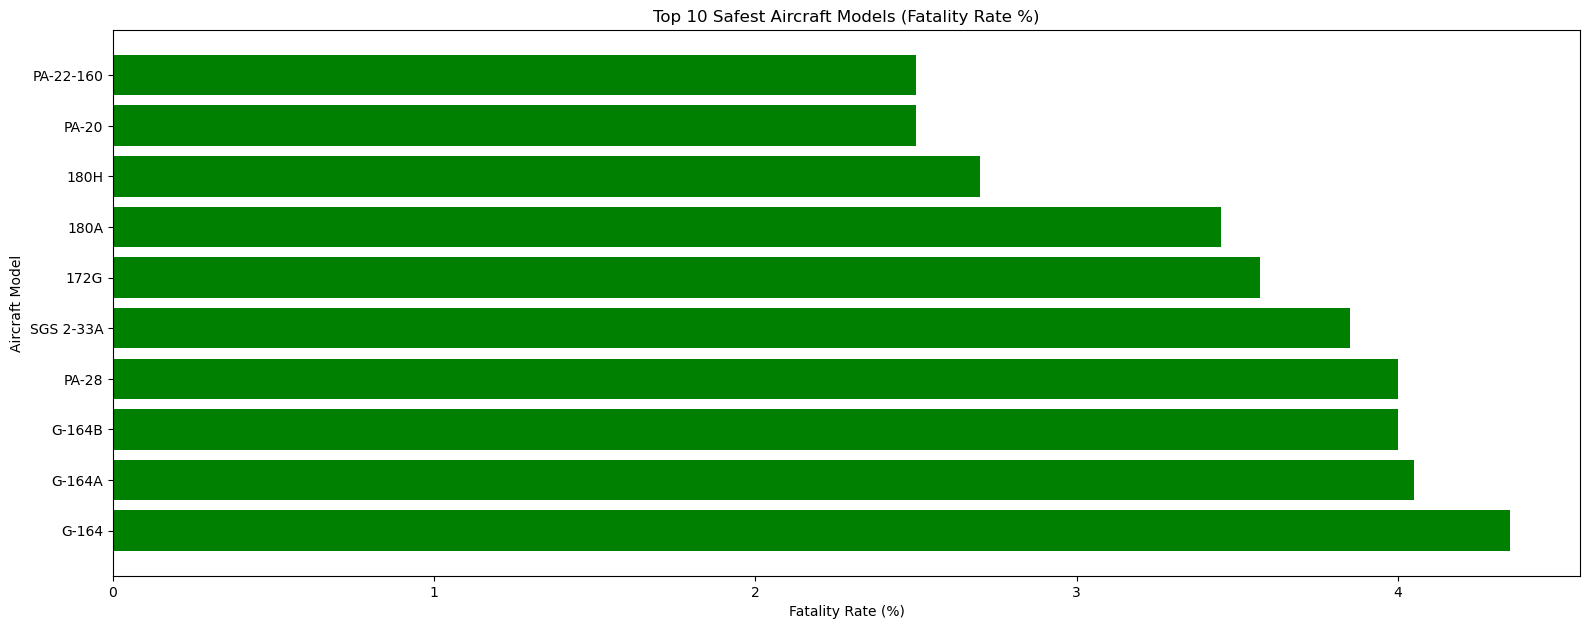

In [64]:
# Plotting Top 10 Safest Models
safest_models = {
    'PA-22-160': 2.50, 'PA-20': 2.50, '180H': 2.70, '180A': 3.45,
    '172G': 3.57, 'SGS 2-33A': 3.85, 'PA-28': 4.00, 'G-164B': 4.00,
    'G-164A': 4.05, 'G-164': 4.35
}

plt.figure(figsize=(16, 12))
# Plot for Top 10 Safest Models
plt.subplot(2, 1, 2)
plt.barh(list(safest_models.keys()), list(safest_models.values()), color='green')
plt.title('Top 10 Safest Aircraft Models (Fatality Rate %)')
plt.xlabel('Fatality Rate (%)')
plt.ylabel('Aircraft Model')
plt.gca().invert_yaxis()

# Show plots
plt.tight_layout()
plt.show()

Models like PA-22-160, PA-20 and 180H have remarkably low fatality rates, suggesting they are much safer options.

## 6. Advanced Analysis
Here we will analyze:
-States with the most accidents
-Analyze cities where accidents are more frequent
-Identify accident concentration geographically

# Accident Frequency by State

In [68]:
# Extracting state abbreviation 
df_cleaned['State'] = df_cleaned['Location'].str.extract(r',\s*([A-Z]{2})$')

# Displaying the first few rows to confirm
df_cleaned[['Location', 'State']].head(5)


,Location,State
2,"Saltville, VA",VA
5,"BOSTON, MA",MA
593,"MOBILE, AL",AL
3654,"Goldendale, WA",WA
6202,"Kalispell, MT",MT


In [69]:
# Counting the number of accidents by each state
state_counts = df_cleaned['State'].value_counts()

# Selecting the top 10 states with the highest number of accidents
top_10_states = state_counts.head(10)
print(top_10_states)

State
CA    3221
TX    2496
FL    2429
AK    2204
AZ    1336
CO    1053
WA    1040
GA     887
ID     729
NC     727
Name: count, dtype: int64


# Plotting Top 10 States with the Highest Number of Accidents

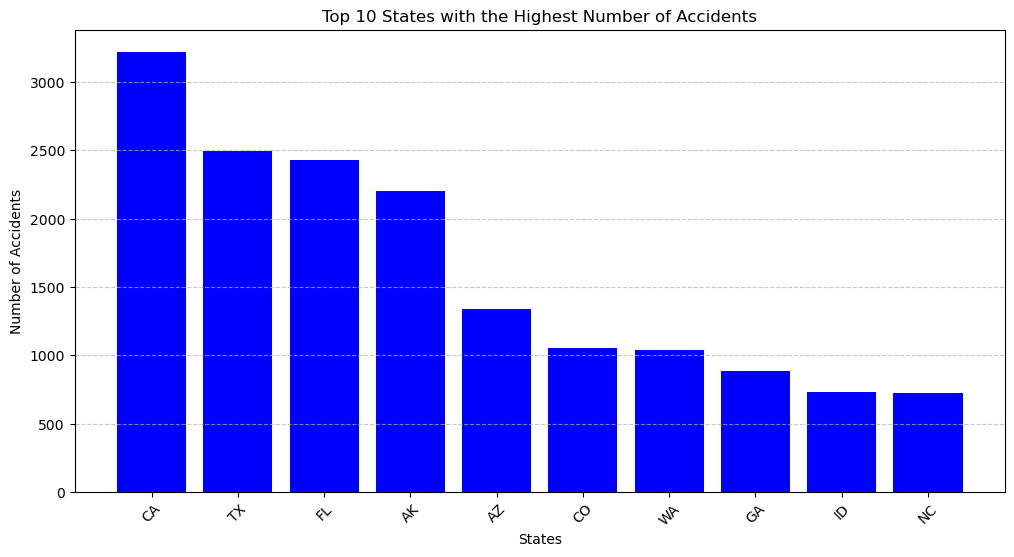

In [71]:
# Top 10 states with accidents
state_counts = {'CA': 3221, 'TX': 2496, 'FL': 2429, 'AK': 2204, 'AZ': 1336, 'CO': 1053, 'WA': 1040, 'GA': 887, 'ID': 729, 'NC': 727}

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(state_counts.keys(), state_counts.values(), color='blue')
plt.title('Top 10 States with the Highest Number of Accidents')
plt.xlabel('States')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Display
plt.show()

Findings:
The top 10 states with the highest number of aviation accidents are California (CA), Texas (TX), Florida (FL), and Alaska (AK), which collectively account for a significant proportion of total accidents. 
California leads with 3,221 accidents, followed by Texas and Florida, each exceeding 2,000 incidents. Alaska also has a notably high number of accidents.

Insights:
The high accident count in California, Texas, and Florida may be attributed to their large geographical areas, busy airspaces, and significant aviation activity, especially in urban areas. 
Alaska’s high accident rate can be linked to frequent use of small aircraft for transportation in remote regions and harsh weather conditions. 
The accident prevention strategies could focus on high-risk states by improving pilot training, enhancing weather monitoring systems, strict regulations and upgrading airport infrastructure to reduce risks.

# Top Cities with the most Accidents

In [74]:
# Extracting city names from the Location column 
df_cleaned['City'] = df_cleaned['Location'].str.split(',').str[0].str.strip()

# Counting the top 10 cities with the most accidents
city_counts = df_cleaned['City'].value_counts().head(10)
print(city_counts)

City
Anchorage    114
Phoenix       92
Denver        87
Atlanta       83
Houston       79
Las Vegas     77
Palmer        77
Talkeetna     75
ANCHORAGE     74
Miami         73
Name: count, dtype: int64


We can see that some cities like 'Anchorage' and 'ANCHORAGE' are duplicates due to inconsistent capitalization. We proceed to clean the city names before counting.

In [76]:
# Converting city names to lowercase for consistency
df_cleaned['City'] = df_cleaned['City'].str.lower()

# Recounting the top 10 cities
city_counts = df_cleaned['City'].value_counts().head(10)
print(city_counts)

City
anchorage    188
phoenix      126
fairbanks    118
houston      112
palmer       103
atlanta      102
talkeetna    101
denver        97
san diego     92
tucson        91
Name: count, dtype: int64


# Plotting Top 10 Cities with the Highest Number of Accidents


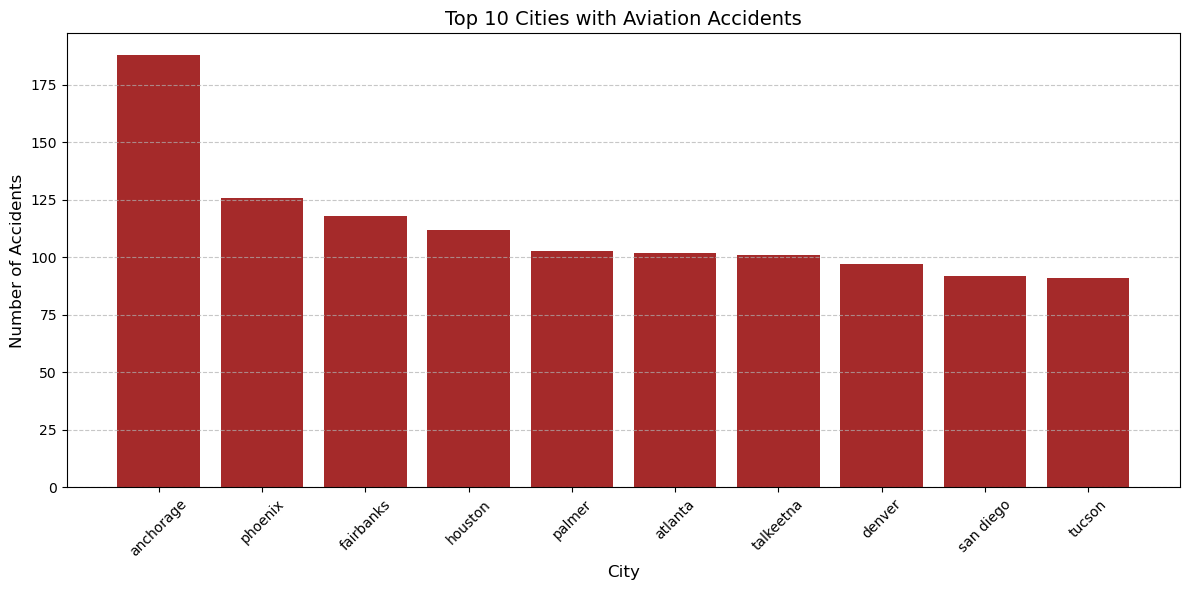

In [78]:
# Top 10 cities with accidents
city_counts = {
    "anchorage": 188,
    "phoenix": 126,
    "fairbanks": 118,
    "houston": 112,
    "palmer": 103,
    "atlanta": 102,
    "talkeetna": 101,
    "denver": 97,
    "san diego": 92,
    "tucson": 91,
}

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(city_counts.keys(), city_counts.values(), color='brown')
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.title('Top 10 Cities with Aviation Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display 
plt.tight_layout()
plt.show()

Findings:
Anchorage, Phoenix, and Fairbanks lead as the cities with the highest number of aviation accidents with Anchorage standing out significantly with 188 accidents, while other cities like Houston Palmer, Atlanta, and Talkeetna also experience a high frequency of incidents.

Insights:
Anchorage, Fairbanks, and Palmer being in Alaska suggests the challenging flying conditions in this region might contribute to the high accident count.
Urban hubs like Phoenix, Houston, and Atlanta also report a large number of accidents, likely due to higher air traffic volumes.
Some cities, such as Talkeetna and Palmer, are smaller towns with heavy aviation activity, possibly related to tourism, scenic flights, or remote transport services.

## Conclusion and Recommendations for Aviation Division
Key Findings:
Top Riskiest Aircraft Models: Models such as the 737-200, MD-83, A330 and 737-400 have extremely high fatality rates. These should be avoided, especially for initial investments in commercial operations.

Top Safest Aircraft Models: Models like PA-22-160, PA-20 and 180H show low fatality rates, making them ideal models for consideration. These models are suitable for private and smaller-scale commercial operations due to their proven safety record.

Weather-Related Risks: A significant number of accidents occur during adverse weather conditions, particularly in poor visibility, high winds, rainy or foggy conditions. Operations should be planned with weather forecasts in mind, with strict safety protocols for flying in these environments.

High-Risk Locations: Certain cities such as Anchorage, Phoenix and Fairbanks show high accident concentrations. These areas are likely affected by challenging terrain, severe weather, or heavy aviation traffic. Robust safety measures should be prioritized for operations in such locations.


## Recommendations
Avoid High-Risk Models: Avoid aircraft models with historically high fatality rates like 37-200, MD-83, A330 and 737-400. Focus on safer models with a strong safety record like PA-22-160, PA-20 and 180H.

Invest in Proven Safe Aircraft: For a balanced fleet, invest in models like PA-22-160, PA-20, 180H, 172G and similar models, which offer reliability and lower operational risks for both private and commercial use.

Weather and Location Planning: Establish weather-based no-fly policies to minimize exposure to dangerous conditions.

Avoid expanding operations in high-risk regions without enhanced pilot training and safety protocols specific to those environments.

Regular Maintenance and Safety Checks: Ensure that maintenance schedules are strictly followed, as older models are more prone to mechanical failures, increasing accident risk.

Training and Safety Protocols: Implement comprehensive training programs for pilots and operational staff to reduce human errors, a significant contributor to accidents.